In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly 
import plotly.plotly as py 
import plotly.figure_factory as ff
from plotly.graph_objs import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import scipy.stats as stats
import math

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



In [3]:
monthlyAsylumSeekers = pd.read_csv("../data/refugee_monthly.csv", sep=",", engine='python', encoding ='latin1')   
monthlyAsylumSeekers = monthlyAsylumSeekers[monthlyAsylumSeekers['Value'] != '*']
monthlyAsylumSeekers['Value'] = monthlyAsylumSeekers['Value'].apply(pd.to_numeric)
monthlyAsylumSeekers.head()

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Greece,Georgia,2008,March,140
1,Greece,Georgia,2008,April,199
2,Greece,Georgia,2008,May,210
3,Greece,Georgia,2008,June,208
4,Greece,Georgia,2008,July,224


Assignment 4 will be done on the 4 Countries that have had more than 100,000 people flee through out the years

In [4]:
Monthly=monthlyAsylumSeekers.sort_values(['Value']).groupby(['Origin'], sort=False)['Value'].sum()
Monthly.head()

Origin
Saint Lucia     3671
Maldives         226
Malaysia       21031
Montenegro     13738
Monaco            14
Name: Value, dtype: int64

Armenia, Mexico, Sri Lanka, and Ukraine will be used

In [5]:
MexicoMonthly=monthlyAsylumSeekers[(monthlyAsylumSeekers['Origin']=='Mexico')]
SriLankaMonthly=monthlyAsylumSeekers[(monthlyAsylumSeekers['Origin']=='Sri Lanka')]
ArmeniaMonthly=monthlyAsylumSeekers[(monthlyAsylumSeekers['Origin']=='Armenia')]
UkraineMonthly=monthlyAsylumSeekers[monthlyAsylumSeekers['Origin']=='Ukraine']
ArmeniaMonthly.head()

,Country / territory of asylum/residence,Origin,Year,Month,Value
258,Greece,Armenia,2013,February,3
651,Greece,Armenia,2013,March,3
780,Greece,Armenia,2013,April,8
781,Greece,Armenia,2013,May,1
782,Greece,Armenia,2013,June,3


Mean refugees for each country

In [6]:
MexicoMeanMonthly=MexicoMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].mean()
SriLankaMeanMonthly=SriLankaMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].mean()
ArmeniaMeanMonthly=ArmeniaMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].mean()
UkraineMeanMonthly=UkraineMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].mean()
UkraineMeanMonthly.head()

Year  Month   
1999  April       11.884615
      August      22.592593
      December    24.035714
      February    11.125000
      January     13.040000
Name: Value, dtype: float64

The median amount of refugees for each country

In [7]:

MexicoMedianMonthly=MexicoMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].median()
SriLankaMedianMonthly=SriLankaMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].median()
ArmeniaMedianMonthly=ArmeniaMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].median()
UkraineMedianMonthly=UkraineMonthly.groupby(['Year', 'Month'], as_index=True, sort=True)['Value'].median()
UkraineMedianMonthly.head()

Year  Month   
1999  April        4.5
      August      12.0
      December     8.5
      February     5.5
      January      9.0
Name: Value, dtype: float64

In [8]:
MexicoQuantile= [MexicoMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0),   
            MexicoMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.25),
            MexicoMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.50),
            MexicoMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.75),
            MexicoMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(1)]
UkraineQuantile= [UkraineMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0),   
            UkraineMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.25),
            UkraineMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.50),
            UkraineMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.75),
            UkraineMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(1)]
ArmeniaQuantile= [ArmeniaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0),   
            ArmeniaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.25),
            ArmeniaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.50),
            ArmeniaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.75),
            ArmeniaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(1)]
SriLankaQuantile= [SriLankaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0),   
            SriLankaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.25),
            SriLankaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.50),
            SriLankaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(0.75),
            SriLankaMonthly.groupby(['Year', 'Month'], sort=True)['Value'].quantile(1)]


### Minimum Value

In [9]:
MexicoQuantile[0].head()

Year  Month   
1999  April        1.0
      August      18.0
      December     1.0
      February    17.0
      January      7.0
Name: Value, dtype: float64

In [10]:
UkraineQuantile[0].head()

Year  Month   
1999  April       1.0
      August      1.0
      December    2.0
      February    1.0
      January     1.0
Name: Value, dtype: float64

In [11]:
SriLankaQuantile[0].head()

Year  Month   
1999  April       1.0
      August      2.0
      December    1.0
      February    1.0
      January     1.0
Name: Value, dtype: float64

In [12]:
ArmeniaQuantile[0].head()

Year  Month   
1999  April       1.0
      August      1.0
      December    2.0
      February    1.0
      January     1.0
Name: Value, dtype: float64

### Median

In [13]:
MexicoQuantile[1].head()

Year  Month   
1999  April       14.5
      August      18.0
      December    16.0
      February    17.0
      January      7.0
Name: Value, dtype: float64

In [14]:
UkraineQuantile[1].head()

Year  Month   
1999  April       2.0
      August      5.5
      December    4.0
      February    2.0
      January     6.0
Name: Value, dtype: float64

In [15]:
SriLankaQuantile[1].head()

Year  Month   
1999  April       2.00
      August      5.00
      December    8.00
      February    5.25
      January     4.25
Name: Value, dtype: float64

In [16]:
ArmeniaQuantile[1].head()

Year  Month   
1999  April       4.50
      August      3.25
      December    9.00
      February    5.00
      January     2.00
Name: Value, dtype: float64

### Mean

In [17]:
MexicoQuantile[2].head()

Year  Month   
1999  April       19.0
      August      18.0
      December    21.0
      February    17.0
      January      7.0
Name: Value, dtype: float64

In [18]:
UkraineQuantile[2].head()

Year  Month   
1999  April        4.5
      August      12.0
      December     8.5
      February     5.5
      January      9.0
Name: Value, dtype: float64

In [19]:
SriLankaQuantile[2].head()

Year  Month   
1999  April       10.0
      August      29.0
      December    18.5
      February    21.0
      January     35.5
Name: Value, dtype: float64

In [20]:
ArmeniaQuantile[2].head()

Year  Month   
1999  April       11.0
      August      18.5
      December    19.5
      February    20.0
      January      6.0
Name: Value, dtype: float64

### Maximum

In [21]:
MexicoQuantile[3].head()

Year  Month   
1999  April       37.75
      August      65.00
      December    36.00
      February    36.00
      January     46.50
Name: Value, dtype: float64

In [22]:
UkraineQuantile[3].head()

Year  Month   
1999  April       22.0
      August      22.0
      December    23.0
      February    16.0
      January     19.0
Name: Value, dtype: float64

In [23]:
SriLankaQuantile[3].head()

Year  Month   
1999  April        52.0
      August       81.0
      December     85.5
      February     51.0
      January     109.0
Name: Value, dtype: float64

In [24]:
ArmeniaQuantile[3].head()

Year  Month   
1999  April       38.0
      August      67.0
      December    57.0
      February    80.0
      January     44.0
Name: Value, dtype: float64

### Divergence of Mean and Median (All four countries have a relatively high divergence each year with Mexico having the highest total divergence. This means these countries will probably be skewed)

In [25]:
Mexicodivergence=MexicoMeanMonthly-MexicoMedianMonthly
Mexicodivergence.sum()

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning:

The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6




15566.597360972361

In [26]:
UkraineDivergence=UkraineMeanMonthly-UkraineMedianMonthly
UkraineDivergence.sum()

2698.3391884971238

In [27]:
ArmeniaDivergence=ArmeniaMeanMonthly-ArmeniaMedianMonthly
ArmeniaDivergence.sum()

3188.5790070018224

In [28]:
SriLankaDivergence=SriLankaMeanMonthly-SriLankaMedianMonthly
SriLankaDivergence.sum()

4687.0586037352832

##### The mean is noticebly more than the median so the density plot is skewed to the right. This means we have outliers a the right end of the distribution

Mexico


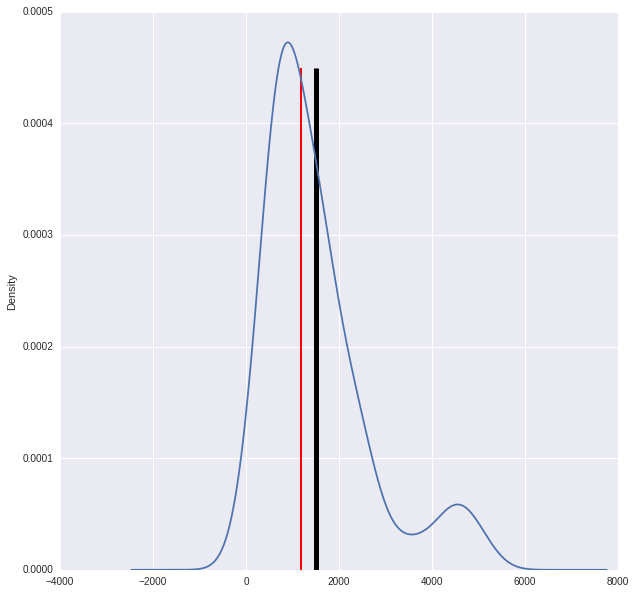

Armenia


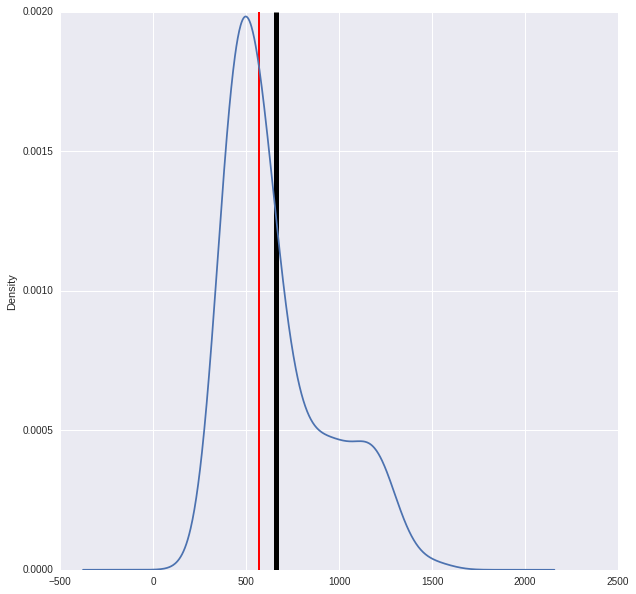

Sri Lanka


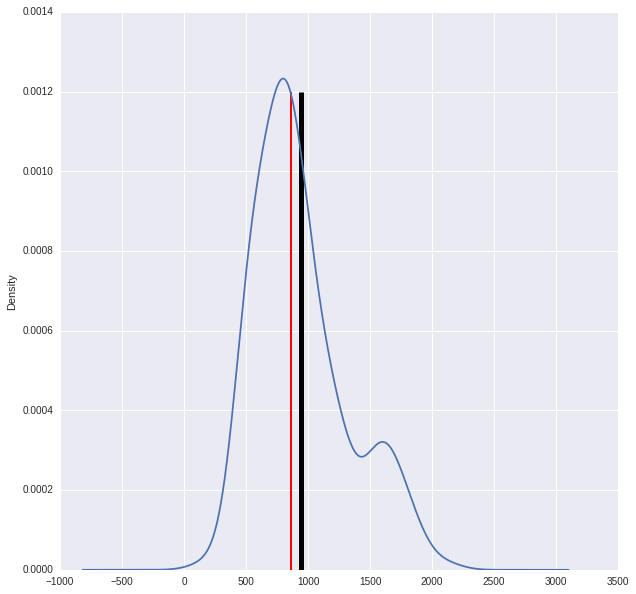

Ukraine


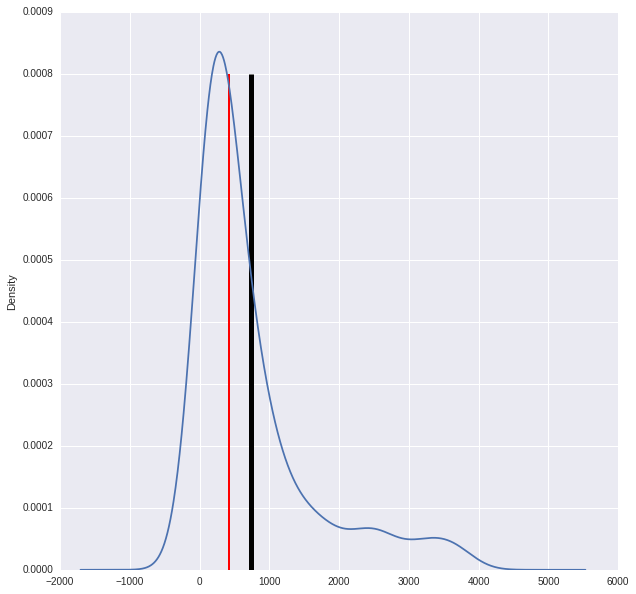

In [29]:
countries=['Mexico', 'Armenia','Sri Lanka', 'Ukraine']
i=0
while i<len(countries):
    print countries[i]
    
    CertainMonthlyData = monthlyAsylumSeekers[(monthlyAsylumSeekers['Origin']==countries[i])].groupby(['Year','Month'], as_index=True, sort=True)['Value'].sum()                        
    fig, ax = plt.subplots(figsize=(5, 4))
    CertainMonthlyData.plot(kind="density",
              figsize=(10,10), ax=ax)
    if(countries[i]=='Mexico'):
        max=0.00045
    if(countries[i]=='Armenia'):
        max=0.002
    if(countries[i]=='Sri Lanka'):
        max=0.0012
    if(countries[i]=='Ukraine'):
        max=0.0008
    
    plt.vlines(CertainMonthlyData.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=max,
           linewidth=5.0)

    plt.vlines(CertainMonthlyData.median(),   # Plot red line at median
           ymin=0, 
           ymax=max, 
           linewidth=2.0,
           color="red")
    plt.show()
    i=i+1


##### Cumulative distribution function (CDF)

Mexico


TypeError: 'numpy.float64' object cannot be interpreted as an index

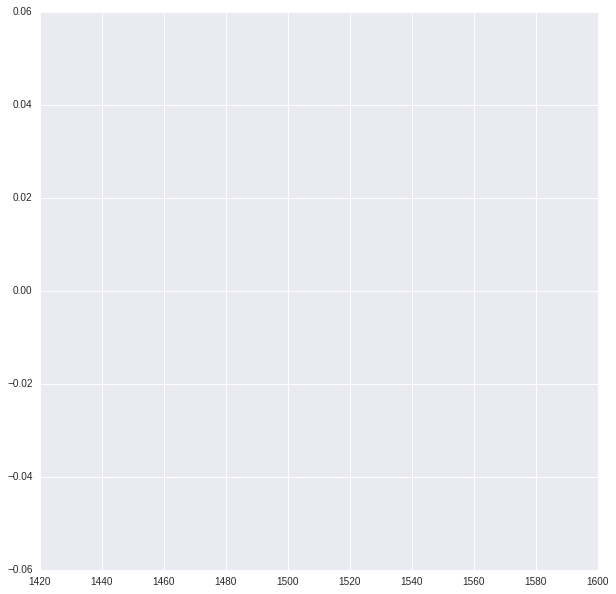

In [30]:
countries=['Mexico', 'Armenia','Sri Lanka', 'Ukraine']
i=0
while i<len(countries):
    print countries[i]
    
    CertainMonthlyData = monthlyAsylumSeekers[(monthlyAsylumSeekers['Origin']==countries[i])].groupby(['Year','Month'], as_index=True, sort=True)['Value'].sum()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.distplot(CertainMonthlyData,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True), ax=ax)
    plt.show()
    i=i+1;

# Poisson Distribution

In [ ]:
countries=['Mexico', 'Armenia','Sri Lanka', 'Ukraine']
i=0
while i<len(countries):
    print countries[i]
    
    CertainMonthlyData = monthlyAsylumSeekers[(monthlyAsylumSeekers['Origin']==countries[i])].groupby(['Year','Month'], as_index=True, sort=True)['Value'].sum()                        
    fig, ax = plt.subplots(figsize=(5, 4))
    if(countries[i]=='Mexico'):
        meanMexico=math.ceil(CertainMonthlyData.mean())
        mean=meanMexico
        medianMexico=CertainMonthlyData.median()
        median=medianMexico
        varMexico=CertainMonthlyData.var() #Calculating var her for method of moments
    if(countries[i]=='Armenia'):
        meanArmenia=math.ceil(CertainMonthlyData.mean())
        mean=meanArmenia
        medianArmenia=CertainMonthlyData.median()
        median=medianArmenia
        varArmenia=CertainMonthlyData.var()
    if(countries[i]=='Sri Lanka'):
        meanSriLanka=math.ceil(CertainMonthlyData.mean())
        mean=meanSriLanka
        medianSriLanka=CertainMonthlyData.median()
        median=medianSriLanka
        varSriLanka=CertainMonthlyData.var()
    if(countries[i]=='Ukraine'):
        meanUkraine=math.ceil(CertainMonthlyData.mean())
        mean=meanUkraine
        medianUkraine=CertainMonthlyData.median()
        median=medianUkraine
        varUkraine=CertainMonthlyData.var()
    maxNum=CertainMonthlyData.max()
    print "mean "+str(mean)
    print "median "+str(median)
    print "maximum number "+str(maxNum)
    CertainMonthlyData.plot(kind='hist',range=(-0.5,maxNum+0.5), bins=maxNum/100, ec='black')
    i=i+1
    plt.show()

##### All distributions:
The poisson distribution is skewed to the right so the lower the frequency of leaves the higher the amount of people leave each time. Ukraine is the most heavily skewed and the least skewed is Sri Lanka.
##### Mexico
The highest frequency is near a thousand people leaving. So if there is a high frequency of people leaving in a time period, then it will probably be around a thousand
##### Armenia
The highest frequency is 400-500 people leaving at a time
##### Sri Lanka
The highest frequency is 800-900 people leaving at a time
##### Ukraine
Ukraine has the highest amount of leaves, but each leave is no more than 250 poeple.

##### Check probabilities with cdf

In [ ]:
print "Mexico: "+str(stats.poisson.cdf(k=medianMexico,     # Check the probability of k leaves or less
                  mu=meanMexico))   # With leave rate of 1509(mean arrival rate)
print "Armenia: "+str(stats.poisson.cdf(k=medianArmenia,     # Check the probability of k leaves or less
                  mu=meanArmenia))   # With leave rate of 660(mean arrival rate)
print "Sri Lanka: "+str(stats.poisson.cdf(k=medianSriLanka,     # Check the probability of k leaves or less
                  mu=meanSriLanka))   # With leave rate of 941(mean arrival rate)
print "Ukraine: "+str(stats.poisson.cdf(k=medianUkraine,     # Check the probability of k leaves or less
                  mu=meanUkraine))   # With leave rate of 743(mean arrival rate)

Each distribution had the probabilties tested with the poisson cdf. Their means were used at the mu value and their median values were used as k-values.
Ukraine had the lowest probabilty, basically 0, since its median(of number of people leaving per month) and its mean(average amount of people leaving per month) have such a high divergence. 
Mexico also has a bascially 0 probility in this case since its divergence is also high.
Armenia and Sri Lanka both have high divergences, but not as bad as Mexico and Ukraine

##### The poisson Distribution is appropriate for this data because we can find out the probabilty of a certain amount of people fleeing thier country at a time

### Method of Moments

We need the mean and variance of each country to calculate method of moments

In [ ]:
alpha_mom_mexico = meanMexico** 2 / varMexico
beta_mom_mexico = varMexico / meanMexico
print "Mexico"
print alpha_mom_mexico
print beta_mom_mexico
alpha_mom_armenia = meanArmenia** 2 / varArmenia
beta_mom_armenia = varArmenia / meanArmenia
print "Armenia"
print alpha_mom_armenia
print beta_mom_armenia
alpha_mom_SriLanka = meanSriLanka** 2 / varSriLanka
beta_mom_SriLanka = varSriLanka / meanSriLanka
print "Sri Lanka"
print alpha_mom_SriLanka
print beta_mom_SriLanka
alpha_mom_ukraine = meanUkraine** 2 / varUkraine
beta_mom_ukraine = varUkraine / meanUkraine
print "Ukraine"
print alpha_mom_ukraine
print beta_mom_ukraine

# Linear Regression

In [ ]:
def cleanDataSets(df):
    # dropping empty rows 
    df2=df.dropna(subset=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
                 '2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 
                  how='all')
    # dropping empty columns 
    df3=df2.dropna(axis=1, how='all')
    df4=df3.drop('Indicator Code',axis=1)
    df5=df4.drop('Indicator Name',axis=1)
    return df5

In [ ]:
foodDeficitByCountry = pd.read_csv("../data/depth_of_the_food_deficit/food_deficit.csv", sep='\t', engine='python', encoding ='latin1', index_col=0)                 
filteredFoodDeficitByCountry = cleanDataSets(foodDeficitByCountry)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('Country Code', axis=1)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('1992', axis=1)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('1993', axis=1)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('1994', axis=1)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('1995', axis=1)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('1996', axis=1)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('1997', axis=1)
filteredFoodDeficitByCountry =filteredFoodDeficitByCountry.drop('1998', axis=1)

filteredFoodDeficitByCountry.head()

In [ ]:
MexicoFoodDeficit=filteredFoodDeficitByCountry.loc['Mexico']
ArmeniaFoodDeficit=filteredFoodDeficitByCountry.loc['Armenia']
SriLankaFoodDeficit=filteredFoodDeficitByCountry.loc['Sri Lanka']
#UkraineFoodDeficit=filteredFoodDeficitByCountry.loc['Ukraine'] Apparently Ukraine is not in the food deficit

In [ ]:
MexicoYearly=MexicoMonthly.groupby(['Year'], as_index=True, sort=True)['Value'].sum()
SriLankaYearly=SriLankaMonthly.groupby(['Year'], as_index=True, sort=True)['Value'].sum()
ArmeniaYearly=ArmeniaMonthly.groupby(['Year'], as_index=True, sort=True)['Value'].sum()
#UkraineYearly=UkraineMonthly.groupby(['Year'], as_index=True, sort=True)['Value'].sum()
ArmeniaYearly.head()

In [ ]:
dataFoodDeficitMexico=pd.DataFrame({'Year':MexicoFoodDeficit.index, 'Food_Deficit':MexicoFoodDeficit.values})
#dataFoodDeficitMexico.set_index('Year', inplace=True, drop=True)
dataFoodDeficitArmenia=pd.DataFrame({'Year':ArmeniaFoodDeficit.index, 'Food_Deficit':ArmeniaFoodDeficit.values})
#dataFoodDeficitArmenia.set_index('Year', inplace=True, drop=True)
dataFoodDeficitSriLanka=pd.DataFrame({'Year':SriLankaFoodDeficit.index, 'Food_Deficit':SriLankaFoodDeficit.values})
#dataFoodDeficitSriLanka.set_index('Year', inplace=True, drop=True)
dataFoodDeficitArmenia.head()

In [ ]:
dataRefugeeMexico=pd.DataFrame({'Year':MexicoYearly.index, 'Refugees':MexicoYearly.values})
#dataRefugeeMexico.set_index('Year', inplace=True, drop=True)
dataRefugeeArmenia=pd.DataFrame({'Year':ArmeniaYearly.index, 'Refugees':ArmeniaYearly.values})
#dataRefugeeArmenia.set_index('Year', inplace=True, drop=True)
dataRefugeeSriLanka=pd.DataFrame({'Year':SriLankaYearly.index, 'Refugees':SriLankaYearly.values})
#dataRefugeeSriLanka.set_index('Year', inplace=True, drop=True)
dataRefugeeMexico.head()

In [ ]:
combinedMexico=dataRefugeeMexico.merge(dataFoodDeficitMexico,how='inner', left_index=True, right_index=True)
combinedMexico.set_index('Year_x', inplace=True, drop=True)
combinedMexico.index.name='Year'
combinedMexico=combinedMexico.drop('Year_y', axis=1)
combinedArmenia=dataRefugeeArmenia.merge(dataFoodDeficitArmenia,how='inner', left_index=True, right_index=True)
combinedArmenia.set_index('Year_x', inplace=True, drop=True)
combinedArmenia.index.name='Year'
combinedArmenia=combinedArmenia.drop('Year_y', axis=1)
combinedSriLanka=dataRefugeeSriLanka.merge(dataFoodDeficitSriLanka,how='inner', left_index=True, right_index=True)
combinedSriLanka.set_index('Year_x', inplace=True, drop=True)
combinedSriLanka.index.name='Year'
combinedSriLanka=combinedSriLanka.drop('Year_y', axis=1)
combinedArmenia.head()

In [ ]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model for the countries
lmMex = smf.ols(formula='Refugees ~ Food_Deficit', data=combinedMexico).fit()
lmArm = smf.ols(formula='Refugees ~ Food_Deficit', data=combinedArmenia).fit()
lmSri = smf.ols(formula='Refugees ~ Food_Deficit', data=combinedSriLanka).fit()

# print the coefficients
print "Mexico"
print lmMex.params
print "Armenia"
print lmArm.params
print "Sri Lanka"
print lmSri.params

In [ ]:
Mexico_new=pd.DataFrame({'Food_Deficit':[combinedMexico['Food_Deficit'].min(),combinedMexico['Food_Deficit'].max()]})
Armenia_new=pd.DataFrame({'Food_Deficit':[combinedArmenia['Food_Deficit'].min(),combinedArmenia['Food_Deficit'].max()]})
SriLanka_new=pd.DataFrame({'Food_Deficit':[combinedSriLanka['Food_Deficit'].min(),combinedSriLanka['Food_Deficit'].max()]})
SriLanka_new.head()

In [ ]:
# make predictions for those x values and store them
Mexico_preds = lmMex.predict(Mexico_new)
print "Mexico"
print Mexico_preds
Armenia_preds = lmArm.predict(Armenia_new)
print "Armenia"
print Armenia_preds
SriLanka_preds = lmSri.predict(SriLanka_new)
print "Sri Lanka"
print SriLanka_preds


In [ ]:
plt.figure(1)
# first, plot the observed data
combinedMexico.plot(kind='scatter', x='Food_Deficit', y='Refugees')

# then, plot the least squares line
plt.plot(Mexico_new, Mexico_preds, c='red', linewidth=2)
plt.title("Mexico")
plt.figure(2)
combinedArmenia.plot(kind='scatter', x='Food_Deficit', y='Refugees')

plt.plot(Armenia_new, Armenia_preds, c='red', linewidth=2)
plt.title("Armenia")
plt.figure(3)
combinedSriLanka.plot(kind='scatter', x='Food_Deficit', y='Refugees')

plt.plot(SriLanka_new, SriLanka_preds, c='red', linewidth=2)
plt.title("Sri Lanka")

## Null hypothiesis: Food deficit has no affect on the number of refugees

In [ ]:
# print the confidence intervals for the model coefficients
print "Mexico"
print lmMex.conf_int()
print "\nArmenia"
print lmArm.conf_int()
print "\nSri Lanka"
print lmSri.conf_int()

In [ ]:
# print the p-values for the model coefficients
print "Mexico"
print lmMex.pvalues
print "Armenia"
print lmArm.pvalues
print "Sri Lanka"
print lmSri.pvalues

The p-value for Food deficit for Mexico and Armenia is less than .05 so we can reject the null hypothsis and say that there is a relationship between food deficit and people fleeing the country.
Sri Lanka's food deficit p-value, however, is greater than 0.05 so for this country we cannot reject the null hypothsis and say there is no relationship between food deficit and people fleeing the country